# Logistic Regression for classification

In logistic regression, we use the sigmoid function to determine the probability that a given set of features will produce a given categorical variable.

### Import python libraries

In [16]:
# import data science libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import sklearn libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve

# import sklearn datasets
from sklearn.datasets import load_iris, load_breast_cancer


## Social Network Dataset

Predicting whether users will purchase a product from an ad based on their age & estimated salary.

### Import dataset

In [17]:
# import dataset, ignore index column
dataset_sn = pd.read_csv('datasets/social_network.csv')
dataset_sn.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [18]:
# split dataset into X and y
X_sn = dataset_sn.iloc[:, :-1].values
y_sn = dataset_sn.iloc[:, -1].values

# print see first 5 rows of X and y
print(f'First 5 rows of X: {X_sn[:5]}')
print(f'First 5 rows of y: {y_sn[:5]}')

First 5 rows of X: [[   19 19000]
 [   35 20000]
 [   26 43000]
 [   27 57000]
 [   19 76000]]
First 5 rows of y: [0 0 0 0 0]


### Visualize the dataset

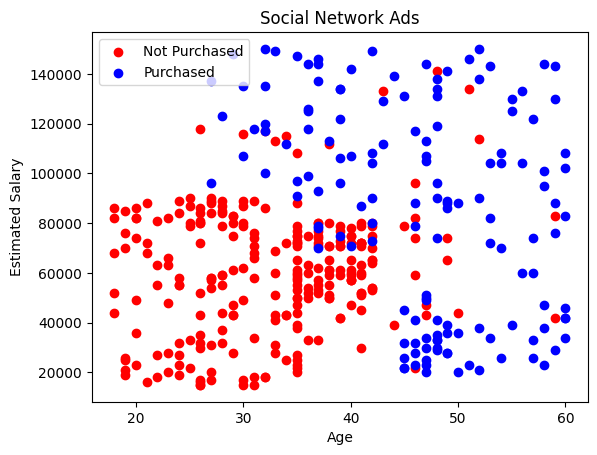

In [19]:
# visualize dataset
plt.scatter(X_sn[y_sn == 0, 0], X_sn[y_sn == 0, 1], color = 'red', label = 'Not Purchased')
plt.scatter(X_sn[y_sn == 1, 0], X_sn[y_sn == 1, 1], color = 'blue', label = 'Purchased')
plt.title('Social Network Ads')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### Preprocess dataset

In [20]:
# Split dataset into training and test set
X_sn_train, X_sn_test, y_sn_train, y_sn_test = train_test_split(X_sn, y_sn, test_size = 0.25, random_state = 42)

# print number of training and test set
print(f'Number of training set: {len(X_sn_train)}')
print(f'Number of test set: {len(X_sn_test)}')

# Feature Scaling
sc_sn = StandardScaler()
X_sn_train = sc_sn.fit_transform(X_sn_train)
X_sn_test = sc_sn.transform(X_sn_test)

# print first 5 rows of X_train
print(f'First 5 rows of X_train: {X_sn_train[:5]}')

# print first 5 rows of X_test
print(f'First 5 rows of X_test: {X_sn_test[:5]}')

Number of training set: 300
Number of test set: 100
First 5 rows of X_train: [[ 1.8925893   1.52189404]
 [ 0.1250379   0.03213212]
 [ 0.9106163  -1.31157471]
 [-1.34792161 -1.48684082]
 [-0.169554   -0.58129926]]
First 5 rows of X_test: [[ 0.812419   -1.39920777]
 [ 2.0889839   0.52871943]
 [-0.95513241 -0.75656537]
 [ 1.0088136   0.76240757]
 [-0.85693511 -1.22394166]]


### Develop logistic regression model - training set

In [21]:
# Train Logistic Regression model on training set
log_classifier = LogisticRegression(random_state = 42)
log_classifier.fit(X_sn_train, y_sn_train)

# predict training set results
y_sn_pred_train = log_classifier.predict(X_sn_train)

# create y_out_train from y_pred_train and y_train
y_sn_out_train = np.concatenate((y_sn_pred_train.reshape(len(y_sn_pred_train), 1), y_sn_train.reshape(len(y_sn_train), 1)), 1)

# print first 5 rows of y_out_train
print(f'Train vs Predicted: {y_sn_out_train[:5]}')

Train vs Predicted: [[1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]]


### Training set performance

In [22]:
# check performance on training set
sn_cm_train = confusion_matrix(y_sn_train, y_sn_pred_train)
print(f'Confusion Matrix - Training Set: {sn_cm_train}')

sn_accuracy_train = accuracy_score(y_sn_train, y_sn_pred_train)
print(f'Accuracy - Training Set: {sn_accuracy_train}')

sn_f1_train = f1_score(y_sn_train, y_sn_pred_train)
print(f'F1 Score - Training Set: {sn_f1_train}')


Confusion Matrix - Training Set: [[179  15]
 [ 34  72]]
Accuracy - Training Set: 0.8366666666666667
F1 Score - Training Set: 0.7461139896373057


### Visualize training set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


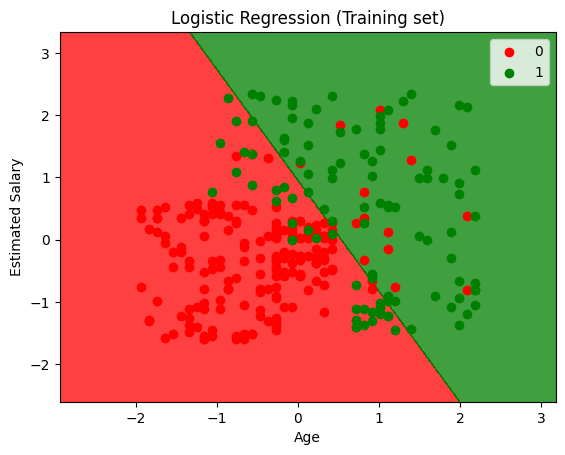

In [23]:
# Visualize training set results
X_set, y_set = X_sn_train, y_sn_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                        np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, log_classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### Predict results on test set

In [24]:
# Predict test set results
y_sn_pred_test = log_classifier.predict(X_sn_test)

# create y_out from y_test and y_pred
y_sn_out_test = np.concatenate((y_sn_test.reshape(len(y_sn_test), 1), y_sn_pred_test.reshape(len(y_sn_pred_test), 1)), 1)

# print first 5 rows of y_out
print(f'Test vs Predicted:\n {y_sn_out_test[:5]}')

Test vs Predicted:
 [[0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]]


### Test set performance

In [25]:
# check performance on test set
sn_cm_test = confusion_matrix(y_sn_test, y_sn_pred_test)
print(f'Confusion Matrix - Test Set: {sn_cm_test}')

sn_accuracy_test = accuracy_score(y_sn_test, y_sn_pred_test)
print(f'Accuracy - Test Set: {sn_accuracy_test}')

sn_f1_test = f1_score(y_sn_test, y_sn_pred_test)
print(f'F1 Score - Test Set: {sn_f1_test}')


Confusion Matrix - Test Set: [[61  2]
 [12 25]]
Accuracy - Test Set: 0.86
F1 Score - Test Set: 0.7812500000000001


### Visualize Test Set Results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


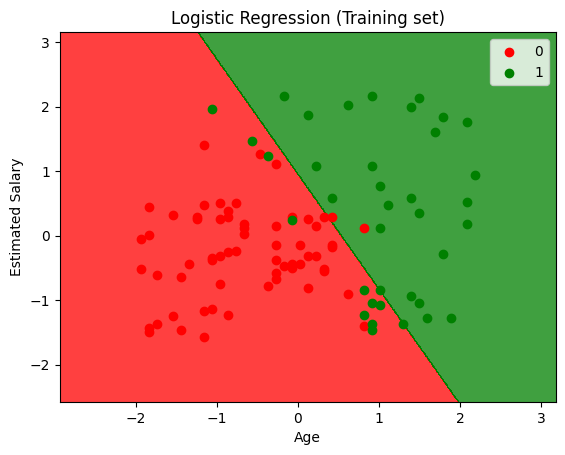

In [26]:
# Visualize test set results
X_set, y_set = X_sn_test, y_sn_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                        np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, log_classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Iris Dataset

The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems, and can also be found on the UCI Machine Learning Repository.

It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

The columns in this dataset are:
Id
SepalLengthCm
SepalWidthCm
PetalLengthCm
PetalWidthCm
Species

Goal is to classify between 3 classes: setosa, versicolor, virginica

Source: sklearn.datasets -> load_iris

### Load and get basic data of the dataset

In [27]:
# load iris dataset
iris = load_iris()

# print iris dataset features
print(f'Features: {iris.feature_names}')

# print iris dataset target
print(f'Targets: {iris.target_names}')

# print iris dataset description
print(iris.DESCR)


Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Targets: ['setosa' 'versicolor' 'virginica']
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.

In [28]:
# separate data into X and y
X_iris = iris.data
y_iris = iris.target

# print first 5 rows of X
print(f'First 5 rows of X: {X_iris[:5]}')

# print first 5 rows of y
print(f'First 5 rows of y: {y_iris[:5]}')

First 5 rows of X: [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
First 5 rows of y: [0 0 0 0 0]


In [29]:
# separate data into training and test sets, stratisfied by y
X_iris_train, X_iris_test, y_iris_train, y_iris_test = train_test_split(X_iris, y_iris, test_size = 0.2, random_state = 42, stratify = y_iris)

# print number of training & test samples
print(f'Number of training samples: {len(X_iris_train)}')
print(f'Number of test samples: {len(X_iris_test)}')

# print first 5 rows of X_train
print(f'First 5 rows of X_train: {X_iris_train[:5]}')

# print first 5 rows of y_train
print(f'First 5 rows of y_train: {y_iris_train[:5]}')

# print first 5 rows of X_test
print(f'First 5 rows of X_test: {X_iris_test[:5]}')

# print first 5 rows of y_test
print(f'First 5 rows of y_test: {y_iris_test[:5]}')


Number of training samples: 120
Number of test samples: 30
First 5 rows of X_train: [[4.4 2.9 1.4 0.2]
 [4.9 2.5 4.5 1.7]
 [6.8 2.8 4.8 1.4]
 [4.9 3.1 1.5 0.1]
 [5.5 2.5 4.  1.3]]
First 5 rows of y_train: [0 2 1 0 1]
First 5 rows of X_test: [[4.4 3.  1.3 0.2]
 [6.1 3.  4.9 1.8]
 [4.9 2.4 3.3 1. ]
 [5.  2.3 3.3 1. ]
 [4.4 3.2 1.3 0.2]]
First 5 rows of y_test: [0 2 1 1 0]


### Build Logistic Regression classifier

In [30]:
# create logistic regression classifier
log_class_iris = LogisticRegression(random_state = 42, multi_class='multinomial', solver='lbfgs')

# fit classifier to training set
log_class_iris.fit(X_iris_train, y_iris_train)

# check performance on training set
iris_cm_train = confusion_matrix(y_iris_train, log_class_iris.predict(X_iris_train))
print(f'Confusion Matrix - Training Set: {iris_cm_train}')

iris_accuracy_train = accuracy_score(y_iris_train, log_class_iris.predict(X_iris_train))
print(f'Accuracy - Training Set: {iris_accuracy_train}')

iris_f1_train = f1_score(y_iris_train, log_class_iris.predict(X_iris_train), average = 'weighted')
print(f'F1 Score - Training Set: {iris_f1_train}')

Confusion Matrix - Training Set: [[40  0  0]
 [ 0 38  2]
 [ 0  1 39]]
Accuracy - Training Set: 0.975
F1 Score - Training Set: 0.9749960931395532


In [31]:
# predict test set results
y_iris_pred_test = log_class_iris.predict(X_iris_test)

# create y_out from y_test and y_pred
y_iris_out_test = np.concatenate((y_iris_test.reshape(len(y_iris_test), 1), y_iris_pred_test.reshape(len(y_iris_pred_test), 1)), 1)

# print first 5 rows of y_out
print(f'Test vs Predicted:\n {y_iris_out_test[:5]}')

# check performance on test set
iris_cm_test = confusion_matrix(y_iris_test, y_iris_pred_test)
print(f'Confusion Matrix - Test Set: {iris_cm_test}')

iris_accuracy_test = accuracy_score(y_iris_test, y_iris_pred_test)
print(f'Accuracy - Test Set: {iris_accuracy_test}')

iris_f1_test = f1_score(y_iris_test, y_iris_pred_test, average = 'weighted')
print(f'F1 Score - Test Set: {iris_f1_test}')


Test vs Predicted:
 [[0 0]
 [2 2]
 [1 1]
 [1 1]
 [0 0]]
Confusion Matrix - Test Set: [[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]
Accuracy - Test Set: 0.9666666666666667
F1 Score - Test Set: 0.9665831244778613


In [32]:
# Compare between training and test set performance
print(f'Accuracy - Training Set: {iris_accuracy_train}')
print(f'Accuracy - Test Set: {iris_accuracy_test}')

print(f'F1 Score - Training Set: {iris_f1_train}')
print(f'F1 Score - Test Set: {iris_f1_test}')


Accuracy - Training Set: 0.975
Accuracy - Test Set: 0.9666666666666667
F1 Score - Training Set: 0.9749960931395532
F1 Score - Test Set: 0.9665831244778613


## Wisconsin Breast Cancer Dataset

The goal is classify patients between bening & malignant cancer.

Attribute Information:

1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)
b) texture (standard deviation of gray-scale values)
c) perimeter
d) area
e) smoothness (local variation in radius lengths)
f) compactness (perimeter^2 / area - 1.0)
g) concavity (severity of concave portions of the contour)
h) concave points (number of concave portions of the contour)
i) symmetry
j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

Source: sklearn.datasets -> load_breast_cancer

### Import dataset

In [33]:
#load cancer dataset
cancer_data = load_breast_cancer()

# print cancer dataset features
print(f'Features: {cancer_data.feature_names}')

# print cancer dataset target
print(f'Targets: {cancer_data.target_names}')

# print cancer dataset description
print(cancer_data.DESCR)

Features: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Targets: ['malignant' 'benign']
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of g

In [34]:
# separate data into X and y
X_cancer = cancer_data.data
y_cancer = cancer_data.target

# print shape of X
print(f'Shape of X: {X_cancer.shape}')

# print first 5 rows of X
print(f'First 5 rows of X: {X_cancer[:5]}')

# print first 5 rows of y
print(f'First 5 rows of y: {y_cancer[:5]}')

Shape of X: (569, 30)
First 5 rows of X: [[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]
 [1.142e+01 2.038e+01 7.75

In [35]:
# separate data into training and test sets, stratisfied by y
X_cancer_train, X_cancer_test, y_cancer_train, y_cancer_test = train_test_split(X_cancer, y_cancer, test_size = 0.2, random_state = 42, stratify = y_cancer)

# print number of training & test samples
print(f'Number of training samples: {len(X_cancer_train)}')
print(f'Number of test samples: {len(X_cancer_test)}')

# features scale using StandardScaler
sc_cancer = StandardScaler()
X_cancer_train = sc_cancer.fit_transform(X_cancer_train)
X_cancer_test = sc_cancer.transform(X_cancer_test)

# print first 5 rows of X_train
print(f'First 5 rows of X_train: {X_cancer_train[:5]}')

Number of training samples: 455
Number of test samples: 114
First 5 rows of X_train: [[-1.07200079e+00 -6.58424598e-01 -1.08808010e+00 -9.39273639e-01
  -1.35939882e-01 -1.00871795e+00 -9.68358632e-01 -1.10203235e+00
   2.81062120e-01 -1.13231479e-01 -7.04860874e-01 -4.40938351e-01
  -7.43948977e-01 -6.29804931e-01  7.48061001e-04 -9.91572979e-01
  -6.93759567e-01 -9.83284458e-01 -5.91579010e-01 -4.28972052e-01
  -1.03409427e+00 -6.23497432e-01 -1.07077336e+00 -8.76534437e-01
  -1.69982346e-01 -1.03883630e+00 -1.07899452e+00 -1.35052668e+00
  -3.52658049e-01 -5.41380026e-01]
 [ 1.74874285e+00  6.65017334e-02  1.75115682e+00  1.74555856e+00
   1.27446827e+00  8.42288215e-01  1.51985232e+00  1.99466430e+00
  -2.93045055e-01 -3.20179716e-01  1.27567198e-01 -3.81382677e-01
   9.40746962e-02  3.17524379e-01  6.39656015e-01  8.73892616e-02
   7.08450758e-01  1.18215034e+00  4.26212305e-01  7.47970186e-02
   1.22834212e+00 -9.28334970e-02  1.18746742e+00  1.10438613e+00
   1.51700092e+00  2.4

### Train logistic regression classifier

In [36]:
# train logistic regression classifier
log_class_cancer = LogisticRegression(random_state = 42)

# fit classifier to training set
log_class_cancer.fit(X_cancer_train, y_cancer_train)

# check performance on training set
cancer_cm_train = confusion_matrix(y_cancer_train, log_class_cancer.predict(X_cancer_train))
print(f'Confusion Matrix - Training Set: {cancer_cm_train}')

cancer_accuracy_train = accuracy_score(y_cancer_train, log_class_cancer.predict(X_cancer_train))
print(f'Accuracy - Training Set: {cancer_accuracy_train}')

cancer_f1_train = f1_score(y_cancer_train, log_class_cancer.predict(X_cancer_train), average = 'weighted')
print(f'F1 Score - Training Set: {cancer_f1_train}')


Confusion Matrix - Training Set: [[166   4]
 [  1 284]]
Accuracy - Training Set: 0.989010989010989
F1 Score - Training Set: 0.9889908435436422


In [37]:
# predict test set results
y_cancer_pred_test = log_class_cancer.predict(X_cancer_test)

# create y_out from y_test and y_pred
y_cancer_out_test = np.concatenate((y_cancer_test.reshape(len(y_cancer_test), 1), y_cancer_pred_test.reshape(len(y_cancer_pred_test), 1)), 1)

# print first 5 rows of y_out
print(f'Test vs Predicted:\n {y_cancer_out_test[:5]}')

# check performance on test set
cancer_cm_test = confusion_matrix(y_cancer_test, y_cancer_pred_test)
print(f'Confusion Matrix - Test Set: {cancer_cm_test}')

cancer_accuracy_test = accuracy_score(y_cancer_test, y_cancer_pred_test)
print(f'Accuracy - Test Set: {cancer_accuracy_test}')

cancer_f1_test = f1_score(y_cancer_test, y_cancer_pred_test, average = 'weighted')
print(f'F1 Score - Test Set: {cancer_f1_test}')


Test vs Predicted:
 [[0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]]
Confusion Matrix - Test Set: [[41  1]
 [ 1 71]]
Accuracy - Test Set: 0.9824561403508771
F1 Score - Test Set: 0.9824561403508771
